# Unit 6: Assignment - What's the Weather Like?
## Project: WeatherPy

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [24]:
# Dependency
import os, sys
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from cycler import cycler
import time
from citipy import citipy
import requests
from pprint import pprint
import tqdm

# Specify directory and set the workspace
# office
# path = '/Users/michaelshih/Documents/code/education/wu_data_bootcamp_code/homework/w6_WeatherPy'
# laptop
path = '/Users/major_minor1982/Documents/code/Python/wu_data_bootcamp_code/homework/w6_WeatherPy'
os.chdir(path)

# import api keys and use imp module to reload
import api_keys
import imp
imp.reload(api_keys)
imp.reload(requests)

<module 'requests' from '/anaconda3/envs/wudata/lib/python3.6/site-packages/requests/__init__.py'>

# Create random coordinates:
* Instead of using np.random.uniform, use scipy.stats.uniform
* Randomization is controlled by defined seed. 

In [2]:
# create a fundtion for generating coordinates
def randomcitycoor(lat_range, lng_range, samplesize, seed = None):
    lat_lngs = []
    # Create a set of random lat and lng combination
    lats = scipy.stats.uniform.rvs(loc = lat_range[0], scale = (lat_range[1] - lat_range[0]), size = samplesize, random_state=seed)
    lngs = scipy.stats.uniform.rvs(loc = lng_range[0], scale = (lng_range[1] - lng_range[0]), size = samplesize, random_state=seed +1)

    lat_lngs = list(zip(lats, lngs))
    return (lat_lngs, lats, lngs)

# Generate the list of cities according to the coordinates.

In [4]:
seed = 1999

# define the range of latitudes and longitude and samplesize
lat_range = (-90, 90)
lng_range = (-180, 180)
samplesize = 1500

# Create the amount of cities based on the maxsize for each round
cities = []
i = 0
maxsize = 1000
while i < maxsize:
    lat_lngs, lats, lngs = randomcitycoor(lat_range, lng_range, samplesize, seed)
    
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        if city not in cities:
            cities.append(city)
    
    i = len(cities)
    seed = seed + 1
    # print(i)
    
# trim down to the target size
target_size = 600
cities = cities[0:target_size]
print('Total city count: {}'.format(len(cities)))

Total city count: 600


# Pull city information from Open Weather Map
* http://www.openweathermap.org

In [5]:
# OpenWeatherMap API Key
# Starting URL for Weather Map API Call
api_key = api_keys.api_key
units = 'imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = '{}appid={}&units={}&q='.format(url, api_key, units)
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=105ef32bc00166f30368855b2471db79&units=imperial&q=


In [6]:
# print the first city for checking the procedure
# the parameter returned form the API
# https://openweathermap.org/current 
test_cities = cities[0]
print(query_url + test_cities)
response = requests.get(query_url + test_cities).json()
pprint(response)

http://api.openweathermap.org/data/2.5/weather?appid=105ef32bc00166f30368855b2471db79&units=imperial&q=suure-jaani
{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 58.54, 'lon': 25.46},
 'dt': 1533265694,
 'id': 588532,
 'main': {'grnd_level': 1023.1,
          'humidity': 74,
          'pressure': 1023.1,
          'sea_level': 1030.81,
          'temp': 64.14,
          'temp_max': 64.14,
          'temp_min': 64.14},
 'name': 'Suure-Jaani',
 'sys': {'country': 'EE',
         'message': 0.0037,
         'sunrise': 1533262340,
         'sunset': 1533321290},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 199.001, 'speed': 3.38}}


In [9]:
# set up lists for latitude, 
# Temperature (F) 
# Humidity (%) 
# Cloudiness (%)
# Wind Speed (mph)
dataid = []
lat = []
lng = []
date = []
temp = []
humd = []
cloud = []
windspd  = []

# request cities information
for i in tqdm.trange(len(cities)):
# for city in cities:
    response = requests.get(query_url + cities[i]).json()
    if response['cod'] != '404':
        dataid.append(response['id'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        date.append(response['dt'])
        temp.append(response['main']['temp'])
        humd.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspd.append(response['wind']['speed'])
    else:
        dataid.append(np.nan)
        lat.append(np.nan)
        lng.append(np.nan)
        date.append(np.nan)
        temp.append(np.nan)
        humd.append(np.nan)
        cloud.append(np.nan)
        windspd.append(np.nan)

100%|██████████| 600/600 [01:10<00:00,  3.10it/s]


In [11]:
# construct data to dataframe
data = pd.DataFrame({
                    'Data ID': dataid,
                    'City Name': cities,
                    'Latitude': lat,
                    'Longitude': lng,
                    'Date': date,
                    'Temperature (F)': temp, 
                    'Humidity (%)': humd,
                    'Cloudiess (%)': cloud,
                    'Wind Speed (mph)': windspd 
                    })

data = data.dropna()
data = data.reset_index(drop = True)
data.head(20)

,Data ID,City Name,Latitude,Longitude,Date,Temperature (F),Humidity (%),Cloudiess (%),Wind Speed (mph)
0,588532.0,suure-jaani,58.54,25.46,1.533266e+09,64.14,74.0,36.0,3.38
1,2729907.0,longyearbyen,78.22,15.63,1.533265e+09,46.40,81.0,75.0,3.36
2,2618795.0,klaksvik,62.23,-6.59,1.533265e+09,50.00,100.0,76.0,3.36
3,3435264.0,concepcion del uruguay,-32.48,-58.24,1.533266e+09,47.22,93.0,92.0,9.08
4,3380290.0,sinnamary,5.38,-52.96,1.533266e+09,80.88,95.0,8.0,10.42
5,3366880.0,hermanus,-34.42,19.24,1.533266e+09,42.54,94.0,0.0,7.40
6,5866063.0,kenai,60.55,-151.26,1.533265e+09,53.60,93.0,90.0,8.05
7,503581.0,pyaozerskiy,65.83,31.17,1.533266e+09,61.62,95.0,92.0,4.72
8,3874787.0,punta arenas,-53.16,-70.91,1.533262e+09,41.00,93.0,90.0,6.93
9,5397851.0,south yuba city,39.12,-121.64,1.533264e+09,86.34,25.0,1.0,6.93


In [12]:
# save data to csv file
# output file path
outpath = "output/cities_weather_data.csv"
data.to_csv(outpath, index_label = None)

# Make scatter plot:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [13]:
# Retrive current date from sytem datetime
import datetime
now = datetime.datetime.now()
datatime = now.strftime("%m/%d/%y")
print(datatime)

08/02/18


Text(0,0.5,'Temperature ($^\\circ$F)')

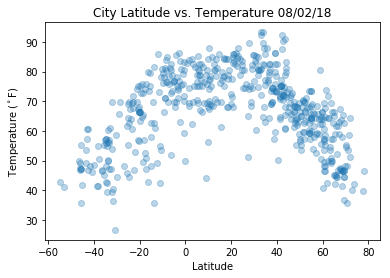

In [31]:
p1 = plt.figure()
plt.scatter(x = data['Latitude'], y = data['Temperature (F)'], alpha = 0.3)
plt.title('City Latitude vs. Temperature ' + datatime)
plt.xlabel('Latitude')
plt.ylabel('Temperature ($^\circ$F)')

Text(0,0.5,'Humidity (%)')

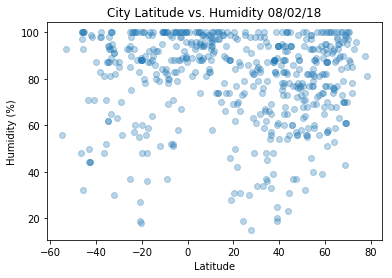

In [32]:
p2 = plt.figure()
plt.scatter(x = data['Latitude'], y = data['Humidity (%)'], alpha = 0.3)
plt.title('City Latitude vs. Humidity ' + datatime)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

Text(0,0.5,'Cloudiess (%)')

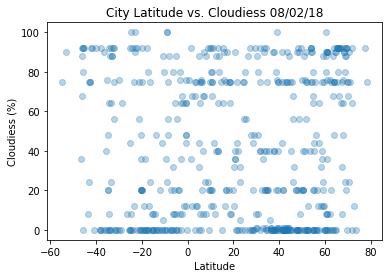

In [33]:
p3 = plt.figure()
plt.scatter(x = data['Latitude'], y = data['Cloudiess (%)'], alpha = 0.3)
plt.title('City Latitude vs. Cloudiess ' + datatime)
plt.xlabel('Latitude')
plt.ylabel('Cloudiess (%)')

Text(0,0.5,'Wind Speed (mph)')

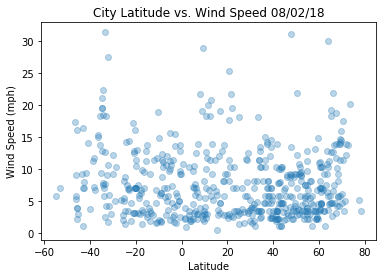

In [34]:
p4 = plt.figure()
plt.scatter(data['Latitude'], data['Wind Speed (mph)'], alpha = 0.3)
plt.title('City Latitude vs. Wind Speed ' + datatime)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')